<a href="https://colab.research.google.com/github/japerezsaavedra/magisterunab_taller1_grupo3/blob/dev/Grupo_3_Magister_UNAB_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1
## Análisis de grandes volúmenes de datos
Manejo de RDDs y DataFrame en Spark

### Instrucciones:

El taller cuenta con 130 puntos.
El taller debe ser entregado como plazo máximo Martes  10 de junio a las 23:59 pm.
Usted deberá crear un notebook en colab en donde instale spark, java, cree las variables de entorno junto a la creación del se sparkSessión sparkContext.
El nombre del notebook deberá ser apellido de los integrantes del grupo, ejemplo: oyarce - navarro.ipynb

# 1.- Instalar entorno de Spark

##1.1.- Instalar jdk, pyspark, hadoop

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!tar xf spark-3.5.6-bin-hadoop3.tgz
# Instalar las bibliotecas de Python necesarias
!pip install -q pyspark==3.5.6
!pip install -q findspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.4/317.4 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##1.2.- Creación de variables de entorno

In [2]:
import os # libreria de manejo del sistema operativo
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"
os.environ["PYTHON_PATH"] = "/content/spark-3.5.6-bin-hadoop3/python/lib/py4j-0.10.9-src.zip"

##1.3.- Creación SparkContext

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('Taller 1')\
        .getOrCreate()
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Taller 1>

Se cuenta con la data de los juegos olímpicos realizados desde sus inicios, para ello se logró crear los siguientes archivos: juegos.json, resultados.csv,evento.csv,equipo.csv,deportistas.csv.
Ellos se relacionan de acuerdo al modelo que se entrega a continuación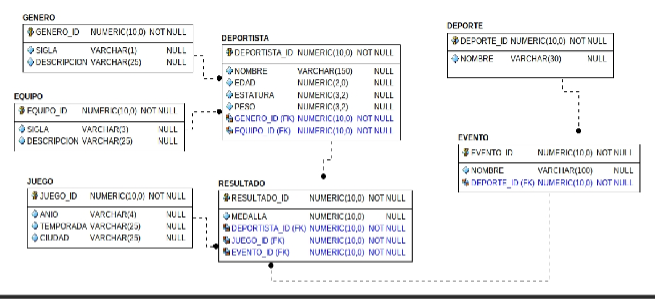

## I.- Manejo y uso de RDDs en Spark

1. [5 ptos] Crear un rdd que posea 6 particiones llamado deportista, que lea el
archivo deportista.csv

In [4]:
deportista = sc.textFile('/content/deportista.csv',6)
deportista.take(20)

['1,A Dijiang,1,24,180,80,199',
 '2,A Lamusi,1,23,170,60,199',
 '3,Gunnar Nielsen Aaby,1,24,0,0,273',
 '4,Edgar Lindenau Aabye,1,34,0,0,278',
 '5,Christine Jacoba Aaftink,2,21,185,82,705',
 '6,Per Knut Aaland,1,31,188,75,1096',
 '7,John Aalberg,1,31,183,72,1096',
 '8,Cornelia Cor Aalten Strannood ,2,18,168,0,705',
 '9,Antti Sami Aalto,1,26,186,96,350',
 '10,Einar Ferdinand Einari Aalto,1,26,0,0,350',
 '11,Jorma Ilmari Aalto,1,22,182,76.5,350',
 '12,Jyri Tapani Aalto,1,31,172,70,350',
 '13,Minna Maarit Aalto,2,30,159,55.5,350',
 '14,Pirjo Hannele Aalto Mattila ,2,32,171,65,350',
 '15,Arvo Ossian Aaltonen,1,22,0,0,350',
 '16,Juhamatti Tapio Aaltonen,1,28,184,85,350',
 '17,Paavo Johannes Aaltonen,1,28,175,64,350',
 '18,Timo Antero Aaltonen,1,31,189,130,350',
 '19,Win Valdemar Aaltonen,1,54,0,0,350',
 '20,Kjetil Andr Aamodt,1,20,176,85,742']

In [5]:
deportista.getNumPartitions()

6

2. [5 ptos] Crear un rdd llamado deportista2, que lea el archivo deportista2.csv.

In [6]:
deportista2 = sc.textFile('/content/deportista.csv')
deportista.take(20)

['1,A Dijiang,1,24,180,80,199',
 '2,A Lamusi,1,23,170,60,199',
 '3,Gunnar Nielsen Aaby,1,24,0,0,273',
 '4,Edgar Lindenau Aabye,1,34,0,0,278',
 '5,Christine Jacoba Aaftink,2,21,185,82,705',
 '6,Per Knut Aaland,1,31,188,75,1096',
 '7,John Aalberg,1,31,183,72,1096',
 '8,Cornelia Cor Aalten Strannood ,2,18,168,0,705',
 '9,Antti Sami Aalto,1,26,186,96,350',
 '10,Einar Ferdinand Einari Aalto,1,26,0,0,350',
 '11,Jorma Ilmari Aalto,1,22,182,76.5,350',
 '12,Jyri Tapani Aalto,1,31,172,70,350',
 '13,Minna Maarit Aalto,2,30,159,55.5,350',
 '14,Pirjo Hannele Aalto Mattila ,2,32,171,65,350',
 '15,Arvo Ossian Aaltonen,1,22,0,0,350',
 '16,Juhamatti Tapio Aaltonen,1,28,184,85,350',
 '17,Paavo Johannes Aaltonen,1,28,175,64,350',
 '18,Timo Antero Aaltonen,1,31,189,130,350',
 '19,Win Valdemar Aaltonen,1,54,0,0,350',
 '20,Kjetil Andr Aamodt,1,20,176,85,742']

In [8]:
deportista2.getNumPartitions()

2

3. [5 ptos] Crear un nuevo rdd llamado deportistaTotal que contenga la unión de los rdd deportista y deportista2.

In [9]:
deportistaTotal = deportista.union(deportista2)

4. [5 ptos] Mostrar la cantidad de registros que posee el rdd deportistaTotal

In [10]:
deportistaTotal.count()

135572

5. [5 ptos] Crear un RDD llamado MayorEdad que permita filtrar todos los deportistas mayores de edad

In [11]:
MayorEdad = deportistaTotal.map(lambda line: line.split(",")).filter(lambda p: len(p) == 7 and int(p[3]) >= 18)
MayorEdad.take(5)

[['1', 'A Dijiang', '1', '24', '180', '80', '199'],
 ['2', 'A Lamusi', '1', '23', '170', '60', '199'],
 ['3', 'Gunnar Nielsen Aaby', '1', '24', '0', '0', '273'],
 ['4', 'Edgar Lindenau Aabye', '1', '34', '0', '0', '278'],
 ['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705']]

6. [5 ptos] Crear un RDD llamado Deportistas_mujer que muestre solo los deportistas del género femenino (sexo=2).

In [12]:
Deportistas_mujer = deportistaTotal.map(lambda line: line.split(",")).filter(lambda p: len(p) == 7 and int(p[2]) == 2)
Deportistas_mujer.take(5)

[['5', 'Christine Jacoba Aaftink', '2', '21', '185', '82', '705'],
 ['8', 'Cornelia Cor Aalten Strannood ', '2', '18', '168', '0', '705'],
 ['13', 'Minna Maarit Aalto', '2', '30', '159', '55.5', '350'],
 ['14', 'Pirjo Hannele Aalto Mattila ', '2', '32', '171', '65', '350'],
 ['21', 'Ragnhild Margrethe Aamodt', '2', '27', '163', '0', '742']]

7. [5 ptos] Convertir a mayúsculas todas las palabras del rdd deportistaTotal

In [13]:
deportistaTotal = deportistaTotal.map(lambda x: x.upper())
deportistaTotal.take(20)

['1,A DIJIANG,1,24,180,80,199',
 '2,A LAMUSI,1,23,170,60,199',
 '3,GUNNAR NIELSEN AABY,1,24,0,0,273',
 '4,EDGAR LINDENAU AABYE,1,34,0,0,278',
 '5,CHRISTINE JACOBA AAFTINK,2,21,185,82,705',
 '6,PER KNUT AALAND,1,31,188,75,1096',
 '7,JOHN AALBERG,1,31,183,72,1096',
 '8,CORNELIA COR AALTEN STRANNOOD ,2,18,168,0,705',
 '9,ANTTI SAMI AALTO,1,26,186,96,350',
 '10,EINAR FERDINAND EINARI AALTO,1,26,0,0,350',
 '11,JORMA ILMARI AALTO,1,22,182,76.5,350',
 '12,JYRI TAPANI AALTO,1,31,172,70,350',
 '13,MINNA MAARIT AALTO,2,30,159,55.5,350',
 '14,PIRJO HANNELE AALTO MATTILA ,2,32,171,65,350',
 '15,ARVO OSSIAN AALTONEN,1,22,0,0,350',
 '16,JUHAMATTI TAPIO AALTONEN,1,28,184,85,350',
 '17,PAAVO JOHANNES AALTONEN,1,28,175,64,350',
 '18,TIMO ANTERO AALTONEN,1,31,189,130,350',
 '19,WIN VALDEMAR AALTONEN,1,54,0,0,350',
 '20,KJETIL ANDR AAMODT,1,20,176,85,742']

8. [10 ptos] Convertir el rdd deportistaTotal en un dataframe llamado deportista que tenga los siguientes títulos de columnas "deportista_id", "nombre", "genero", "edad", "altura", "peso", "equipo_id"

In [14]:
columnas = ["deportista_id", "nombre", "genero", "edad", "altura", "peso", "equipo_id"]

deportista = deportistaTotal.map(lambda l: l.split(",")).filter(lambda p: len(p) == 7).toDF(columnas)

deportista = deportista\
.withColumn("deportista_id",deportista.deportista_id.cast("int"))\
.withColumn("nombre",deportista.nombre.cast("string"))\
.withColumn("genero",deportista.genero.cast("int"))\
.withColumn("edad",deportista.edad.cast("int"))\
.withColumn("altura", deportista.altura.cast("int"))\
.withColumn("peso",deportista.peso.cast("int"))\
.withColumn("equipo_id",deportista.equipo_id.cast("int"))


deportista.show(10, truncate = False)
deportista.printSchema()

+-------------+------------------------------+------+----+------+----+---------+
|deportista_id|nombre                        |genero|edad|altura|peso|equipo_id|
+-------------+------------------------------+------+----+------+----+---------+
|1            |A DIJIANG                     |1     |24  |180   |80  |199      |
|2            |A LAMUSI                      |1     |23  |170   |60  |199      |
|3            |GUNNAR NIELSEN AABY           |1     |24  |0     |0   |273      |
|4            |EDGAR LINDENAU AABYE          |1     |34  |0     |0   |278      |
|5            |CHRISTINE JACOBA AAFTINK      |2     |21  |185   |82  |705      |
|6            |PER KNUT AALAND               |1     |31  |188   |75  |1096     |
|7            |JOHN AALBERG                  |1     |31  |183   |72  |1096     |
|8            |CORNELIA COR AALTEN STRANNOOD |2     |18  |168   |0   |705      |
|9            |ANTTI SAMI AALTO              |1     |26  |186   |96  |350      |
|10           |EINAR FERDINA

## II.- Manejo y uso de DataFrames en Spark

1. [20 ptos] Crear los DataFrame Evento, Resultado, Equipos y Juego los que deben contener los datos de los archivos eventos.csv, equipos, resultado.csv y juego.json.

In [22]:
Evento = spark.read.csv("evento.csv", header = True, sep = ",", inferSchema=True, quote="\"")
Resultado = spark.read.csv("resultados.csv", header = True, sep = ";", inferSchema=True)
Equipos = spark.read.csv("equipo.csv", header = True, inferSchema=True)
Juego = spark.read.option("multiline", "true").json("juegos.json")

deportista.show(4)
Evento.show(4)
Resultado.show(4)
Equipos.show(4)
Juego.show(4)


+-------------+--------------------+------+----+------+----+---------+
|deportista_id|              nombre|genero|edad|altura|peso|equipo_id|
+-------------+--------------------+------+----+------+----+---------+
|            1|           A DIJIANG|     1|  24|   180|  80|      199|
|            2|            A LAMUSI|     1|  23|   170|  60|      199|
|            3| GUNNAR NIELSEN AABY|     1|  24|     0|   0|      273|
|            4|EDGAR LINDENAU AABYE|     1|  34|     0|   0|      278|
+-------------+--------------------+------+----+------+----+---------+
only showing top 4 rows

+----------+--------------------+----------+
|cod_evento|              evento|deporte_id|
+----------+--------------------+----------+
|         1|Basketball Men's ...|         1|
|         2|Judo Men's Extra-...|         2|
|         3|Football Men's Fo...|         3|
|         4|Tug-Of-War Men's ...|         4|
+----------+--------------------+----------+
only showing top 4 rows

+------------+-------+

2. [10 ptos] Realizar optimización de los dataframe que se han creado.

In [16]:
Evento.cache()
Resultado.cache()
Equipos.cache()
Juego.cache()


DataFrame[ano: string, ciudad: string, juego_id: bigint, temporada: bigint]

3. [20 ptos] Crear un nuevo dataframe que contenga los datos de todos los dataframes (deportista, evento, equipo, resultado y juego)

In [26]:
from pyspark.sql.functions import broadcast
dfTodos = (
    Resultado
    .join(broadcast(deportista), "deportista_id")
    .join(broadcast(Equipos), deportista["equipo_id"] == Equipos["id"])
    .join(broadcast(Juego), "juego_id")
    .join(broadcast(Evento), Resultado["evento_id"] == Evento["cod_evento"])
)

dfTodos.show(10)

+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+---+--------------+-----+-------------+--------+---------+----------+--------------------+----------+
|juego_id|deportista_id|resultado_id|medalla|evento_id|              nombre|genero|edad|altura|peso|equipo_id| id|        equipo|sigla|          ano|  ciudad|temporada|cod_evento|              evento|deporte_id|
+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+---+--------------+-----+-------------+--------+---------+----------+--------------------+----------+
|      39|            1|           1|     NA|        1|           A DIJIANG|     1|  24|   180|  80|      199|199|         China|  CHN|  1992 Verano|  Verano|     1992|         1|Basketball Men's ...|         1|
|      39|            1|           1|     NA|        1|           A DIJIANG|     1|  24|   180|  80|      199|199|         China|  CHN|  1992 Verano|  V

4. [10 ptos] Paralelizar el dataframe a 5 particiones.

In [28]:
newTodos = dfTodos.repartition(5)
newTodos.rdd.getNumPartitions()

5

5. [5 ptos] Mostrar la cantidad filas del DataFrame, junto al tipo de datos que contiene y su esquema.

In [29]:
newTodos.count()

204476

In [30]:
newTodos.dtypes

[('juego_id', 'int'),
 ('deportista_id', 'int'),
 ('resultado_id', 'int'),
 ('medalla', 'string'),
 ('evento_id', 'string'),
 ('nombre', 'string'),
 ('genero', 'int'),
 ('edad', 'int'),
 ('altura', 'int'),
 ('peso', 'int'),
 ('equipo_id', 'int'),
 ('id', 'int'),
 ('equipo', 'string'),
 ('sigla', 'string'),
 ('ano', 'string'),
 ('ciudad', 'string'),
 ('temporada', 'bigint'),
 ('cod_evento', 'string'),
 ('evento', 'string'),
 ('deporte_id', 'string')]

In [31]:
newTodos.printSchema()

root
 |-- juego_id: integer (nullable = true)
 |-- deportista_id: integer (nullable = true)
 |-- resultado_id: integer (nullable = true)
 |-- medalla: string (nullable = true)
 |-- evento_id: string (nullable = true)
 |-- nombre: string (nullable = true)
 |-- genero: integer (nullable = true)
 |-- edad: integer (nullable = true)
 |-- altura: integer (nullable = true)
 |-- peso: integer (nullable = true)
 |-- equipo_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- equipo: string (nullable = true)
 |-- sigla: string (nullable = true)
 |-- ano: string (nullable = true)
 |-- ciudad: string (nullable = true)
 |-- temporada: long (nullable = true)
 |-- cod_evento: string (nullable = true)
 |-- evento: string (nullable = true)
 |-- deporte_id: string (nullable = true)



6. [10 ptos] Crear una columna calculada llamada IMC en el dataframe que permita calcular el índice de masa corporal de cada uno de los deportistas.

In [32]:
from pyspark.sql.functions import col
newTodos = newTodos.withColumn("IMC", col("peso") / ((col("altura")*0.01)**2))
newTodos.show()

+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+----+--------------------+-----+-------------+--------+---------+----------+--------------------+----------+------------------+
|juego_id|deportista_id|resultado_id|medalla|evento_id|              nombre|genero|edad|altura|peso|equipo_id|  id|              equipo|sigla|          ano|  ciudad|temporada|cod_evento|              evento|deporte_id|               IMC|
+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+----+--------------------+-----+-------------+--------+---------+----------+--------------------+----------+------------------+
|       5|        55816|      110382|     NA|      150| HUGO ALARIK JONSSON|     1|  24|     0|   0|      350| 350|             Finland|  FIN|  1908 Verano|  Verano|     1908|       150|Swimming Men's 10...|         9|              NULL|
|      51|        60041|      118670|     NA|   

7. [10 ptos] Crear una columna calculada llamada Descripción_sexo en el dataframe que permita determinar el sexo de los deportistas, considerando que la columna sexo=1 es hombre y sexo=2 es mujer.

In [33]:
from pyspark.sql.functions import expr
cond = """case when genero = 1 then 'Hombre'
               else case when genero = 2 then 'Mujer'

                         else 'Genero_No_Valido'
                              end

                end as Descripcion_Sexo"""

df_final = newTodos.withColumn("Descripcion_Sexo", expr(cond))
df_final.show()

+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+----+--------------------+-----+-------------+--------+---------+----------+--------------------+----------+------------------+----------------+
|juego_id|deportista_id|resultado_id|medalla|evento_id|              nombre|genero|edad|altura|peso|equipo_id|  id|              equipo|sigla|          ano|  ciudad|temporada|cod_evento|              evento|deporte_id|               IMC|Descripcion_Sexo|
+--------+-------------+------------+-------+---------+--------------------+------+----+------+----+---------+----+--------------------+-----+-------------+--------+---------+----------+--------------------+----------+------------------+----------------+
|       5|        55816|      110382|     NA|      150| HUGO ALARIK JONSSON|     1|  24|     0|   0|      350| 350|             Finland|  FIN|  1908 Verano|  Verano|     1908|       150|Swimming Men's 10...|         9|              NUL

8. [10 ptos] Crear un DataFrame que permita mostrar la cantidad de medallas de cada una de las categorías (oro, bronce, plata) obtenidas por los Equipos.

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
df_final.createOrReplaceTempView("dffinal")
df_medallas = spark.sql("select medalla,count(medalla) from dfFinal group by medalla")
df_medallas.show()

+-------+--------------+
|medalla|count(medalla)|
+-------+--------------+
|     NA|        174298|
| Silver|          9964|
|   Gold|         10152|
| Bronze|         10062|
+-------+--------------+



9. [10 ptos] Crear un Dataframe que permita obtener suma, promedio, máximo, mínimo de la edad de los deportistas por agrupado el tipo de medalla obtenida.


In [39]:
df_final.createOrReplaceTempView("Tabla")
query = "SELECT medalla AS tipo_medalla, sum(edad) AS suma, mean(edad) AS promedio, max(edad) AS maximo, min(edad) AS minimo FROM Tabla  WHERE edad > 0 AND medalla != 'NA' group by medalla ORDER BY medalla ASC"
medallas_resumen = spark.sql(query)
medallas_resumen.show()

+------------+------+------------------+------+------+
|tipo_medalla|  suma|          promedio|maximo|minimo|
+------------+------+------------------+------+------+
|      Bronze|228922| 23.16086604613517|    52|    13|
|        Gold|233298|23.186046511627907|    64|    11|
|      Silver|225056| 23.13486842105263|    68|    11|
+------------+------+------------------+------+------+



10. [10 ptos] Crear un nuevo DataFrame llamado temporada que permita obtener suma, promedio, máximo, mínimo de las alturas de los deportistas por agrupado por temporada.


In [40]:
query = "SELECT temporada AS temporada, sum(altura) AS suma, round(mean(altura),2) AS promedio, max(altura) AS maximo, min(altura) AS minimo FROM Tabla  WHERE altura > 0 group by temporada ORDER BY temporada ASC"
temporada = spark.sql(query)
temporada.show()

+---------+-------+--------+------+------+
|temporada|   suma|promedio|maximo|minimo|
+---------+-------+--------+------+------+
|     1896|  10640|  177.33|   188|   167|
|     1900|  12084|  177.71|   188|   153|
|     1904|  32348|   175.8|   189|   155|
|     1906|  24420|  179.56|   195|   167|
|     1908|  53912|  177.34|   191|   162|
|     1912|  73244|  177.78|   192|   158|
|     1920|  74066|  176.35|   197|   156|
|     1924| 111880|  175.36|   198|   155|
|     1928| 123226|  176.04|   211|   155|
|     1932| 147136|  174.75|   198|   152|
|     1936| 147078|  176.35|   204|   152|
|     1948| 162926|  176.33|   213|   140|
|     1952| 288832|  174.21|   213|   150|
|     1956| 341724|  173.46|   218|   137|
|     1960|1060202|  173.07|   218|   137|
|     1964|1178446|  173.66|   218|   148|
|     1968|1415834|  173.64|   216|   127|
|     1972|1548230|  174.66|   223|   132|
|     1976|1305334|  174.51|   218|   136|
|     1980|1156532|  175.02|   214|   131|
+---------+

11. [10 ptos] Crear un nuevo DataFrame llamado sexo que permita obtener suma, promedio, máximo, mínimo de la edad de los deportistas por agrupado por sexo.

In [41]:
query = "SELECT Descripcion_sexo AS sexo, sum(edad) AS suma, round(mean(edad),2) AS promedio, max(edad) AS maximo, min(edad) AS minimo FROM Tabla  WHERE edad > 0 group by Descripcion_sexo ORDER BY descripcion_sexo ASC"
sexo = spark.sql(query)
sexo.show()

+------+-------+--------+------+------+
|  sexo|   suma|promedio|maximo|minimo|
+------+-------+--------+------+------+
|Hombre|3250674|   23.65|    71|    11|
| Mujer|1302970|   21.37|    63|    11|
+------+-------+--------+------+------+

